<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="machine.jpeg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Mini Project - Machine Learning <br> Classification model <br> Group 04
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement:


You are working as a data scientist in a global finance company. Over the years, the 
company has collected basic bank details and gathered a lot of credit-related information. 
The management wants to build an intelligent system to segregate the people into credit 
score brackets to reduce manual efforts

# Objective:


The objective of this project is to explore the data to identify the pattern that causes 
the person to have a good or bad or standard type credit score and build a machine 
learning model that should be able to predict or classify the credit score type.

# Attributes:


**ID** - Represents a unique identification of an entry.

**CUSTOMER ID** - This represents the unique identification of a person.

**MONTH** - Represents the month of the year.

**NAME** - Represents the name of a person.

**AGE** - Represents the age of the person.

**SSN** - Represents the social security number of the person.

**OCCUPATION** - Represents the occupation of the person.

**ANNUAL INCOME** - Represents the yearly income of the person.

**MONTHLY IN-HAND SALARY** - Represents the monthly base salary of a person.

**NUM BANK ACCOUNTS** - This represents the number of bank accounts a person holds.

**NUM CREDIT CARD** - This represents the number of other credit cards held by the person.

**INTEREST Rate** - This represents the interest rate on a credit card.

**NUM OF LOAN** - Represents the number of loans taken from the bank.

**TYPE OF LOAN** - Represents the type of loan taken by the person.

**DELAY FROM DUE DATE** - Represents the average number of days delayed from the payment date.

**NUM OF DELAYED PAYMENT** - Represents the average number of payments delayed by a person.

**CHANGED CREDIT LIMIT** - This represents the percentage change in the credit card limit.

**NUM CREDIT INQUIRIES** - Represents the number of credit card inquiries.

**CREDIT MIX** - This represents the classification of the mix of credits.

**OUTSTANDING DEBT** - This represents the remaining debt to be paid(in USD).

**CREDIT UTILIZATION RATIO** - This represents the utilization ratio of credit cards.

**CREDIT HISTORY AGE** - This represents the age of the credit history of the person.

**PAYMENT OF MIN AMOUNT** - Represents whether only the minimum amount was paid by the person.

**TOTAL EMI PER MONTH** - Represents the monthly EMI payments(in USD).

**AMOUNT INVESTED MONTHLY** - Represents the monthly amount invested by the customer(in USD)

**PAYMENT BEHAVIOUR** - Represents the payment behavior of the customer (in USD)

**MONTHLY BALANCE** - Represents the monthly amount of the customer (in USD).




# Understand the business problem:

**Objective:** Develop a machine learning model for automated credit scoring.

**Background:** Dataset contains bank details, credit information, and spans years. Categorical and numerical variables present, with missing values and anomalies. Divided into Train and Test datasets.

**Data Exploration:** Dataset includes customer details, financial information, credit history, and payment behavior.Challenge is to explore data, identify patterns, and build a machine learning model.

**Data Anomalies:** Address anomalies in categorical and numerical variables. Correct values in "Occupation" and "SSN" columns. Handle anomalies in numerical variables like extreme values in "Age" and negative values.

**Data Format Correction:** Dataset requires corrections, e.g., convert "Credit History Age" to float and standardize "Payment of Min Amount" column format.

**Handling Missing Values:** Impute missing values using a customer-wise median.

**Statistical Analysis:** Conduct statistical analyses to understand the relationship between independent variables and the target variableCheck equality of annual income across different credit score brackets.Investigate independence of occupation and credit score.

**Model Building:** Core involves building a classification model.Encode categorical variables, scale numerical features, split dataset into training and testing sets.Build base model, try different models, perform feature selection, and tune the final model.

**Evaluation and Submission:** Evaluate final model using cross-validation.Make predictions on the test dataset for submission.

**Business Insight:** Derive insights from the model results, understand influential features, and assess generalization to new data.


# Required libraries:

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


print("libraries install successfully....!")

libraries install successfully....!


# Upload data:

In [2]:
#train data
train_data = pd.read_csv('train.csv')
train_data.head()
numeric=['Age','Annual_Income','Monthly_Inhand_Salary','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [3]:
#test datasets
test_data = pd.read_csv('test.csv') 
test_data.head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>check for the datatypes.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
train_data.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [4]:
print("\nData Types - Train Dataset:")
print(train_data.dtypes)
print("---------------------------------------------------------------------------------------------------------")
print("\nData Types - Test Dataset:")
print(test_data.dtypes)


Data Types - Train Dataset:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object

# Data Cleaning

In [5]:
# Combine train and test datasets for cleaning
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Display the shape before cleaning
print("Shape before cleaning:", combined_data.shape)

Shape before cleaning: (150000, 28)


In [6]:
# Now perform the necessary cleaning steps as mentioned in the instructions

# Example: Convert columns to numeric
numeric_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
combined_data[numeric_columns] = combined_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Example: Convert 'Month' to datetime
combined_data['Month'] = pd.to_datetime(combined_data['Month'], errors='coerce')

# Continue with other cleaning steps based on your specific requirements

# Display the shape after cleaning
print("Shape after cleaning:", combined_data.shape)

Shape after cleaning: (150000, 28)


In [7]:
# Separate back into train and test datasets
cleaned_train_data = combined_data.iloc[:len(train_data)]
cleaned_test_data = combined_data.iloc[len(train_data):]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>i)Clean the anomalies in the categorical variables. A few anomalies have been 
mentioned here. 

                        1. Occupation - _______

                        2. SSN - #F%$D@*&8
                        
                        3. Payment Behaviour - !@9#%8

Replace the above anomalies by replacing them with the mode of each customer.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# List of columns with anomalies
anomaly_columns = ['Occupation', 'SSN', 'Payment_Behaviour']

# Iterate through each column and replace anomalies with the mode of each customer
for col in anomaly_columns:
    # Identify and replace anomalies
    combined_data[col] = combined_data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if len(x.mode()) > 0 else x)

# Display the first few rows after replacing anomalies
print("\nDataset after replacing anomalies:")
combined_data.head()




Dataset after replacing anomalies:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,NaN,No,49.574949,80.415295,High_spent_Medium_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,High_spent_Medium_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,NaT,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,NaN,No,49.574949,81.699521,High_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,NaN,No,49.574949,199.458074,High_spent_Medium_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,NaN,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [9]:
# Separate back into train and test datasets
cleaned_train_data = combined_data.iloc[:len(train_data)]
cleaned_test_data = combined_data.iloc[len(train_data):]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>ii) Clean the anomalies for numerical variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# List of columns with numerical anomalies
numerical_anomaly_columns = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through each column and replace anomalies with customer-wise median
for col in numerical_anomaly_columns:
    # Convert the column to numeric
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')
    
    # Calculate customer-wise median
    customer_wise_median = combined_data.groupby('Customer_ID')[col].transform('median')
    
    # Replace anomalies with customer-wise median
    combined_data[col] = np.where(combined_data[col] > 100, customer_wise_median, combined_data[col])
    combined_data[col] = np.where(combined_data[col] < 85, customer_wise_median, combined_data[col])

    # Replace negative values with customer-wise median
    combined_data[col] = np.where(combined_data[col] < 0, customer_wise_median, combined_data[col])

# Display the first few rows after replacing anomalies
print("\nDataset after replacing numerical anomalies:")
combined_data.head()





Dataset after replacing numerical anomalies:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,NaN,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
1,0x1603,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
2,0x1604,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,NaN,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
3,0x1605,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,NaN,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good
4,0x1606,CUS_0xd40,NaT,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,NaN,No,49.574949,81.057408,High_spent_Medium_value_payments,321.851976,Good


In [11]:
# Separate back into train and test datasets
cleaned_train_data = combined_data.iloc[:len(train_data)]
cleaned_test_data = combined_data.iloc[len(train_data):]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Convert the Credit_History_Age datatype variable into float data types by taking 
only year and month. 
                        Example. 22 years and 1 month →
                        22.1. And the Payment_of_Min_Amount column you might find some other weird values apart from Yes and No.                         And If you have combined the train and test datasets, then change the month's names into its number
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
numeric=['Age','Annual_Income','Monthly_Inhand_Salary','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
combined_data[numeric].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,142584.000000,1.395000e+05,127500.000000,150000.000000,136770.000000,148223.000000
mean,33.478883,1.740935e+05,4190.115139,1432.513579,165.098165,426.287998
std,10.772669,1.410068e+06,3180.489657,8403.759977,114.888687,195.459197
min,14.000000,7.005930e+03,303.645417,0.000000,15.883071,85.007150
25%,25.000000,1.943560e+04,1625.265833,30.947775,89.126058,291.921990
50%,33.000000,3.755178e+04,3091.000000,71.280006,127.948049,355.378283
75%,42.000000,7.281702e+04,5948.454596,166.279555,207.737877,495.475067
max,100.000000,2.419806e+07,15204.633333,82398.000000,1048.731760,1427.797464


In [13]:
# Convert 'Credit_History_Age' to float by extracting year and month
combined_data['Credit_History_Age'] = combined_data['Credit_History_Age'].apply(lambda x: float(str(x).split()[0]) #float(str(x).split()[2])/12 if 'years' in str(x) and 'months' in str(x) else float(str(x).split()[0]) if 'years' in str(x) else float(str(x).split()[0])/12 if 'months' in str(x) else np.nan)

# Handle 'Payment_of_Min_Amount' column
# Replace weird values with 'Yes' if the value contains 'Yes', and 'No' otherwise
combined_data['Payment_of_Min_Amount'] = np.where(combined_data['Payment_of_Min_Amount'].str.lower().str.contains('yes'), 'Yes', 'No')

# If you have combined the train and test datasets, change the month's names into numbers
# Assuming 'Month' is the column representing the month
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
combined_data['Month'] = combined_data['Month'].map(month_dict)

# Display the first few rows after conversions
print("\nDataset after conversions:")
combined_data.head()

SyntaxError: '(' was never closed (4052984074.py, line 2)

In [ ]:
# Separate back into train and test datasets
cleaned_train_data = combined_data.iloc[:len(train_data)]
cleaned_test_data = combined_data.iloc[len(train_data):]

In [ ]:
cleaned_train_data['Occupation'].value_counts()

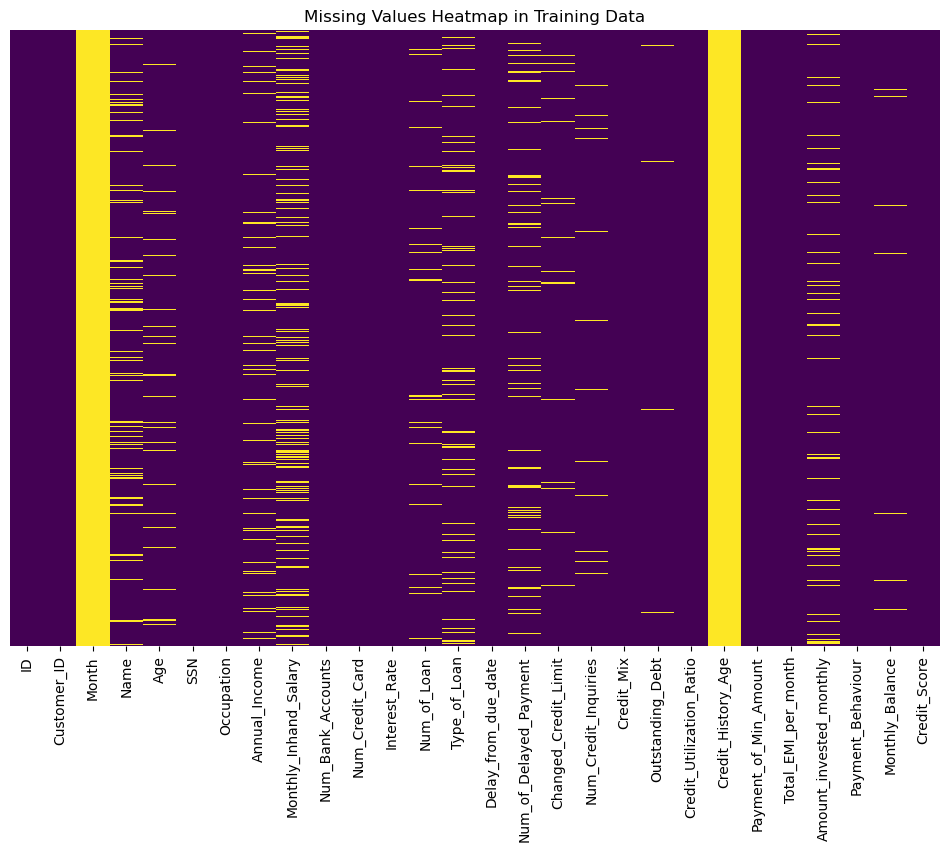

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming missing_train is a DataFrame containing the count of missing values in each column
# You can use seaborn's heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap in Training Data')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Find out the missing values in the data frame and handle them in the best way 
possible. One way of solving this is by imputing the missing values with a customer-wise 
median
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Find missing values in training data
missing_train = cleaned_train_data.isnull().sum()

# Find missing values in testing data
missing_test = cleaned_test_data.isnull().sum()



# Print the results
print("Missing values before imputation in training data:")
print(missing_train)
print("-----------------------------------------------------------------------------------------------------")
print("\nMissing values before imputation in testing data:")
print(missing_test)




In [ ]:
# Impute missing values with customer-wise median in training data
cleaned_train_data = cleaned_train_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x)

# Impute missing values with customer-wise median in testing data
cleaned_test_data = cleaned_test_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x)

In [ ]:
# Verify that there are no missing values left
missing_after_imputation_train = cleaned_train_data.isnull().sum()
missing_after_imputation_test = cleaned_test_data.isnull().sum()
print("\nMissing values after imputation in training data:")
print(missing_after_imputation_train)
print("---------------------------------------------------------------------------------------------------------------")
print("\nMissing values after imputation in testing data:")
print(missing_after_imputation_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform Univariate, Bivariate, and Multivariate analyses to find the factors that 
affect the Target variables.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

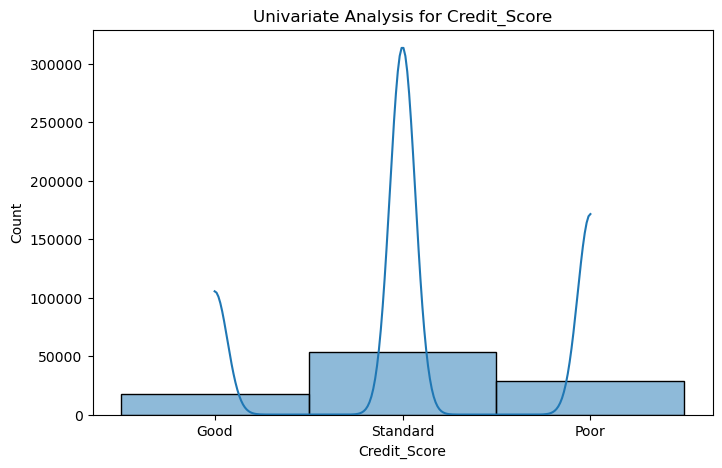

In [18]:
# Univariate analysis for target variable
numeric_columns = ['Credit_Score']
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_train_data[col], kde=True)
    plt.title(f'Univariate Analysis for {col}')
    plt.show()


In [ ]:
#Inference : leptokurtic in nature means there is outliers in the data

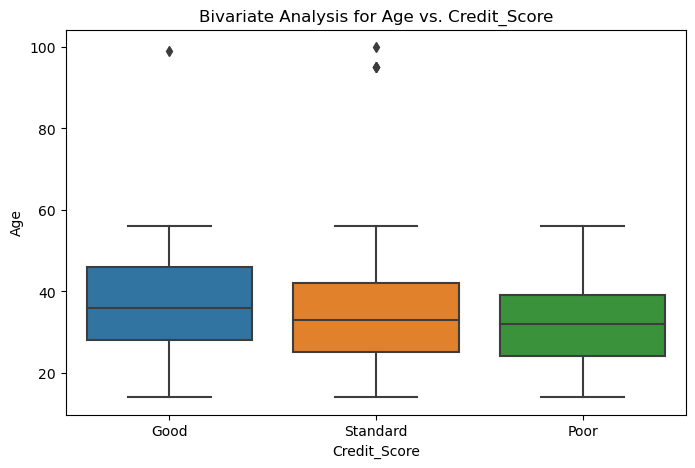

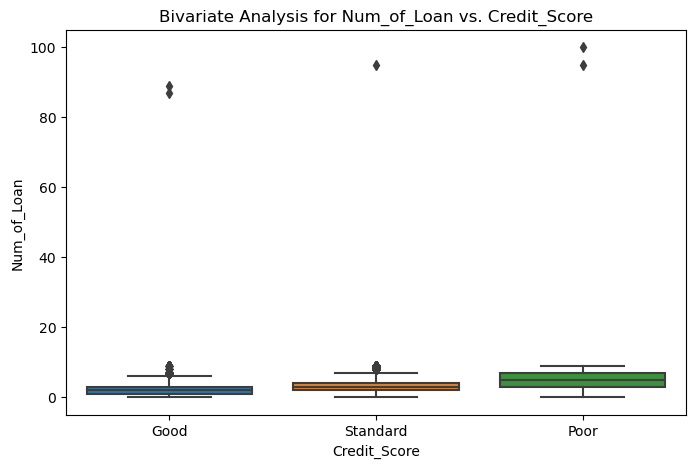

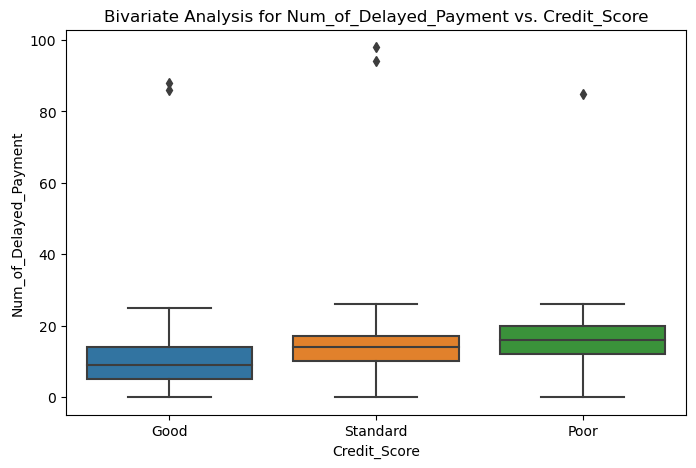

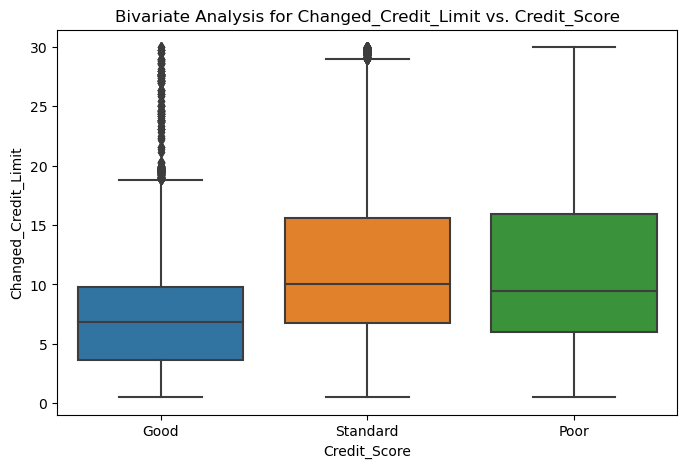

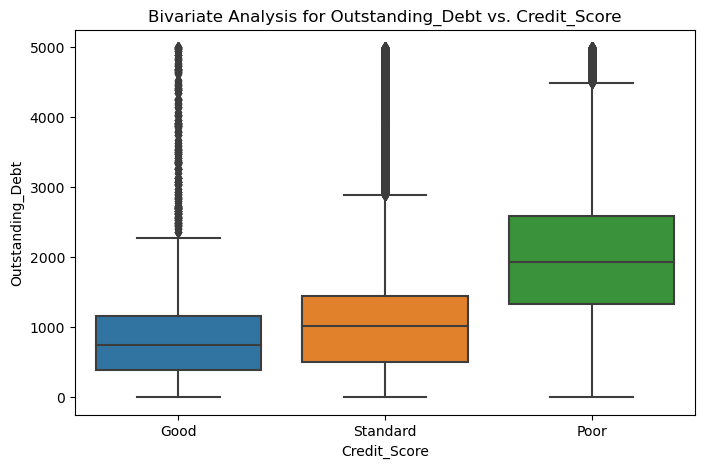

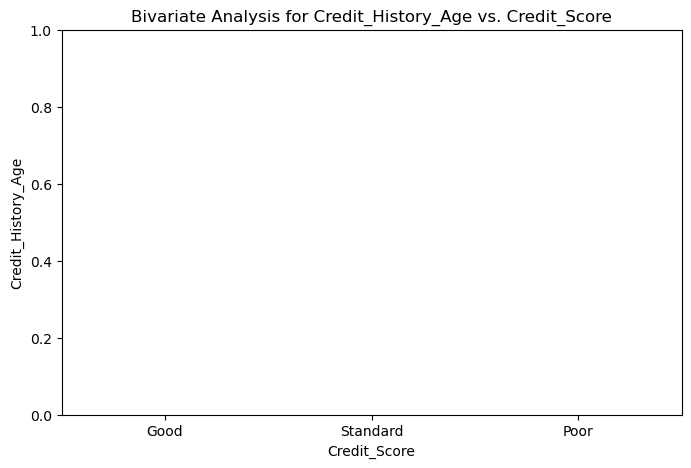

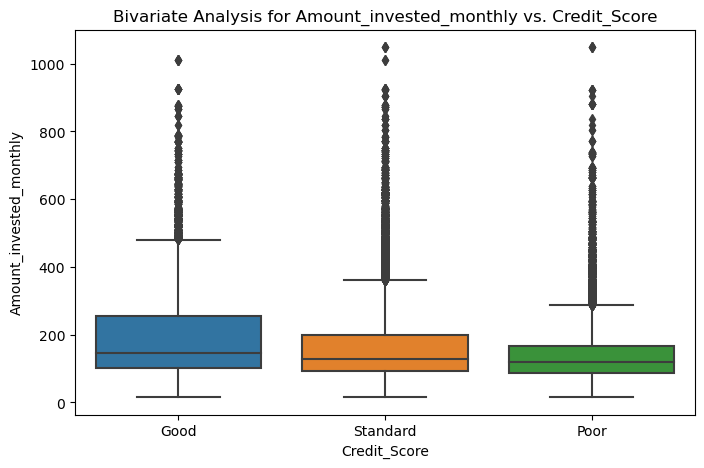

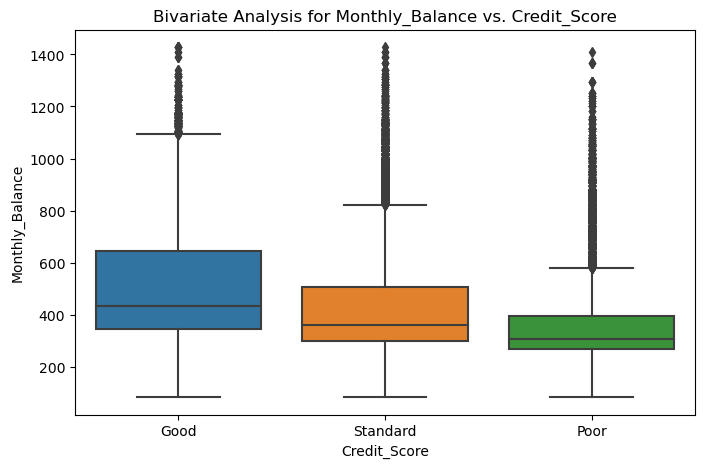

In [20]:
# Bivariate analysis for numeric vs. target variable
for col in numerical_anomaly_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Credit_Score', y=col, data=cleaned_train_data)
    plt.title(f'Bivariate Analysis for {col} vs. Credit_Score')
    plt.show()




In [ ]:
# Assuming 'train_data' is your DataFrame and 'Credit_Score' is the target variable

# Selected categorical columns
selected_columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Calculate the number of rows and columns for subplots
num_rows = (len(selected_columns) + 1) // 2  # Add 1 to round up in case of an odd number of columns
num_cols = 2

# Setting up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes to make it iterable for plotting
axes = axes.flatten()

# Bivariate analysis using count plots for each selected column
for i, column in enumerate(selected_columns):
    sns.countplot(x=column, hue='Credit_Score', data=train_data, ax=axes[i])
    axes[i].set_title(f'{column} vs Credit Score')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Credit Score', loc='upper right')

# Hide any remaining empty subplots
for j in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

plt.show()

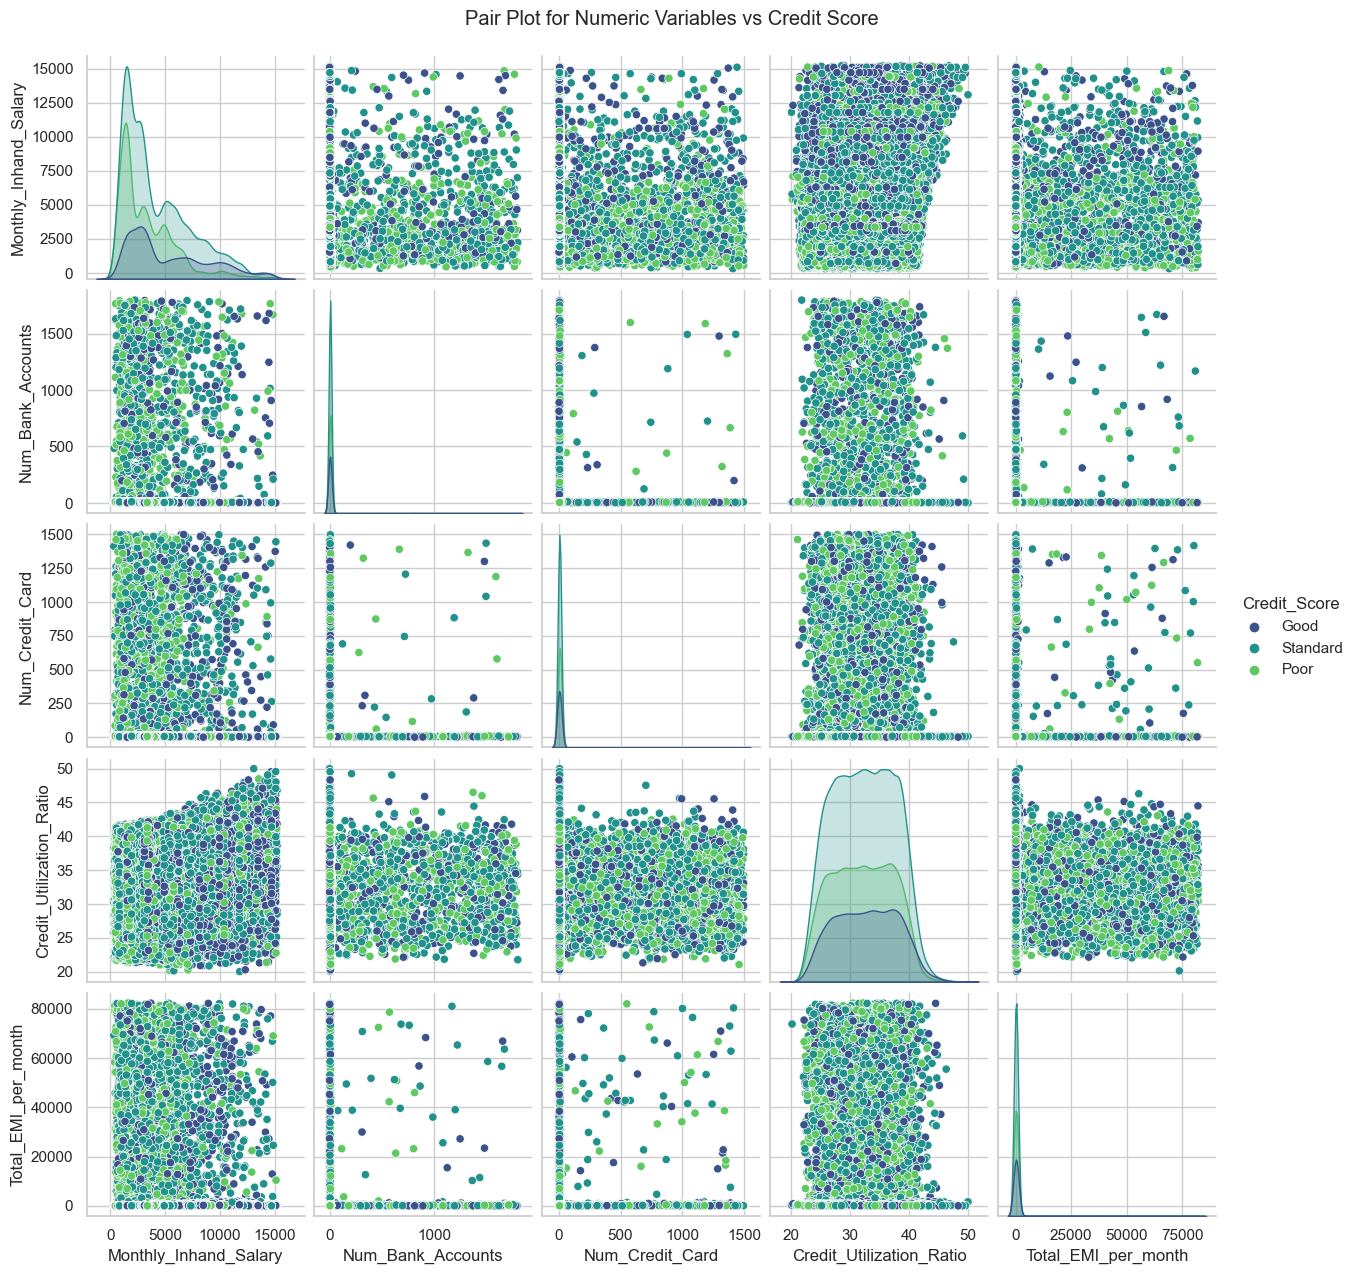

In [30]:
#Multivariate analysis.

# Assuming 'train_data' is your DataFrame and 'Credit_Score' is the target variable

# Selected numeric columns
selected_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
# Adding 'Credit_Score' to the selected columns
selected_columns.append('Credit_Score')
# Creating a DataFrame with only the selected columns
selected_data = train_data[selected_columns]
# Pair plot for multivariate analysis
sns.pairplot(selected_data, hue='Credit_Score', palette='viridis', height=2.5)
plt.suptitle('Pair Plot for Numeric Variables vs Credit Score', y=1.02)
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate your Train dataset and test data set if you combined them in the initial 
steps. (In this step only segregate train and test datasets based on the length of the train 
and test dataset)


Note: Your given test dataset is only for validating and submitting the results. Only 
Use the Train dataset to perform the train test split in the coming steps. Do not use Test to 
build the model and test the model, Since there is no target variable in the test data set you 
can not test the model performance with the test data set. Thus we only consider the 
training dataset and split that into X_train and X_test.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# Separate back into train and test datasets
train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

# Verify the lengths of train and test datasets
print("Train Dataset Length:", len(train_data))
print("Test Dataset Length:", len(test_data))


Train Dataset Length: 100000
Test Dataset Length: 50000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform the Statistical analysis to prove where the independent variables have an 
effect on the Target variables

                        
                        Example: Few statistical analyses:
        1. Check whether the Annual income across all the target variables is significantly the same. Let's fix the alpha is   0.05. Make sure the data is normal and the variance is equal. If not use a Non-parametric statistical test
        2. Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05.
        3. Check if there is a relationship between the Payment Behaviour and Credit Score.
        4. Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes.
        

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 1. Check whether the Annual income across all the target variables is significantly the same. Let's fix the alpha is   0.05. Make sure the data is normal and the variance is equal. If not use a Non-parametric statistical test
        

In [26]:
#normality_check = cleaned_train_data.groupby('Credit_Score')['Annual_Income'].apply(lambda x: x.dropna().values)
#_, p_value_normality = stats.shapiro(normality_check)
from scipy import stats

# Extracting individual arrays for each group in 'Credit_Score'
grouped_data = cleaned_train_data.groupby('Credit_Score')['Annual_Income'].apply(lambda x: x.dropna().values)
# Shapiro-Wilk test for normality
p_values_normality = []
for group_data in grouped_data:
    _, p_value = stats.shapiro(group_data)
    p_values_normality.append(p_value)
# Checking variance equality
_, p_value_variance = stats.levene(*grouped_data)

# Perform ANOVA test if the data is normal and variances are equal, else use Kruskal-Wallis test
if all(p_value > 0.05 for p_value in p_values_normality) and p_value_variance > 0.05:
    _, p_value_anova = stats.f_oneway(*grouped_data)
    print(f"ANOVA p-value: {p_value_anova}")
else:
    _, p_value_kruskal = stats.kruskal(*grouped_data)
    print(f"Kruskal-Wallis p-value: {p_value_kruskal}")


Kruskal-Wallis p-value: 0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 2. Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05.

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(cleaned_train_data['Occupation'], cleaned_train_data['Credit_Score'])

# Perform the chi-squared test
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared p-value: {p_value_chi2}")


Chi-squared p-value: 2.907103747503745e-24


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 3. Check if there is a relationship between the Payment Behaviour and Credit Score.

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_payment = pd.crosstab(cleaned_train_data['Payment_Behaviour'], cleaned_train_data['Credit_Score'])

# Perform the chi-squared test
chi2_stat_payment, p_value_chi2_payment, _, _ = chi2_contingency(contingency_table_payment)
print(f"Chi-squared p-value for Payment Behaviour: {p_value_chi2_payment}")


Chi-squared p-value for Payment Behaviour: 0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 4. Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes.

In [29]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for non-parametric comparison of medians
_, p_value_kruskal_credit = kruskal(*[group['Credit_Utilization_Ratio'] for name, group in 
                                      cleaned_train_data.groupby('Credit_Score')])
print(f"Kruskal-Wallis p-value for Credit_Utilization_Ratio: {p_value_kruskal_credit}")


Kruskal-Wallis p-value for Credit_Utilization_Ratio: 1.082011306670754e-39


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Encode the categorical variables with related technologies. Change the target 
variable classes as (poor to 0, Standard to 1, Good to 2)

In [30]:
# Encode the Credit_Score column
label_encoder = LabelEncoder()
train_data['Credit_Score_Encoded'] = label_encoder.fit_transform(train_data['Credit_Score'])

# Map the target classes as specified (Poor to 0, Standard to 1, Good to 2)
class_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
train_data['Credit_Score'] = train_data['Credit_Score'].map(class_mapping)

In [31]:
train_data.isna().sum()

ID                               0
Customer_ID                      0
Month                       100000
Name                          9985
Age                           4939
SSN                              0
Occupation                       0
Annual_Income                 6980
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                   4785
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        9746
Changed_Credit_Limit          2091
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt              1009
Credit_Utilization_Ratio         0
Credit_History_Age          100000
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       8784
Payment_Behaviour                0
Monthly_Balance               1209
Credit_Score                     0
Credit_Score_Encoded

In [32]:
# Assuming train_data is your DataFrame
numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean value of each column
train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].median())


In [33]:
# Split the data into features (X) and target variable (y)
X = train_data[numeric_features].drop('Credit_Score', axis=1)  
y = train_data['Credit_Score']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 14: Use a train test split on the dataset called a train.

In [34]:
# Impute missing values in X
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [35]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 16)
X_test shape: (20000, 16)
y_train shape: (80000,)
y_test shape: (20000,)


Observation:
Train Dataset: Contains 80000 rows and 16 columns.
Test Dataset: Contains 20000 rows and 0 columns.

This split ensures that 80% of the data is used for training the model, while the remaining 20% is reserved for testing and evaluating the model's performance.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 15: Build the base model. Observe how the model is performing

In [36]:
# Assuming X and y are your feature matrix and target variable
# X should not contain NaNs, so we need to handle missing values first

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("------------------------------------------------------------------------------------------------------")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("------------------------------------------------------------------------------------------------------")
# Print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)



Accuracy: 0.7231
------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[4230 1537  107]
 [1537 7904 1158]
 [  90 1109 2328]]
------------------------------------------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      5874
           1       0.75      0.75      0.75     10599
           2       0.65      0.66      0.65      3527

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



Observation: 

The model training and evaluation have been completed for two models: DecisionTree

DecisionTree:
Accuracy: 72.31%


Classification Report:
Precision: 0.72 for class 0 and 0.75 for class 1 and 0.65 for 2
Recall: 0.72 for class 0 and 0.75 for class 1 and 0.66 for 2
F1-Score: 0.72 for class 0 and 0.75 for class 1 and 0.65 for 2



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 16: Build other models and choose the model which gives the best results

In [40]:
# Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    print("--------------------------------------------------------------------------------------")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"Accuracy for {name}: {accuracy}")
    print("----------------------------------------------------------------------------------------")
    print(f"Confusion Matrix for {name}:\n", conf_matrix)
    print("----------------------------------------------------------------------------------------")
    print(f"Classification Report for {name}:\n", class_report)


Training Random Forest...
--------------------------------------------------------------------------------------
Accuracy for Random Forest: 0.7815
----------------------------------------------------------------------------------------
Confusion Matrix for Random Forest:
 [[4691 1154   29]
 [1317 8458  824]
 [  17 1029 2481]]
----------------------------------------------------------------------------------------
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      5874
           1       0.79      0.80      0.80     10599
           2       0.74      0.70      0.72      3527

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000


Training Gradient Boosting...
--------------------------------------------------------------------------------------
Accuracy for Gradient Boosting: 0.69075


Observation: 

The model training and evaluation have been completed for two models:GradientBoosting and Random Forest.

Random forest:
Accuracy: 78.15%

Classification Report:
Precision: 0.78 for class 0 and 0.80 for class 1 and 0.79 for 2
Recall: 0.79 for class 0 and 0.80 for class 1 and 0.80 for 2
F1-Score: 0.74 for class 0 and 0.70 for class 1 and 0.72 for 2
    
GradientBoosting:
Accuracy: 69.07%

Classification Report:
Precision: 0.74 for class 0 and 0.69 for class 1 and 0.60 for 2
Recall: 0.63 for class 0 and 0.79 for class 1 and 0.49 for 2
F1-Score: 0.68 for class 0 and 0.74 for class 1 and 0.54 for 2

Both models show similar performance metrics.
The Random Forest model has a slightly higher accuracy than the Gradient Boosting .


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 17: Perform Feature selection using different feature selection methods.

In [ ]:
# Assuming you have X_train and y_train from the train-test split
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=3)  # Choose the desired number of features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_train_rfe


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 19: Tune the final model using Grid search CV or Randomized CV or any other 
methods

In [ ]:
# Assuming you have X_train and y_train from the train-test split
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 20: Perform Cross-validation for the final model by setting the best parameters.

In [ ]:
# Assuming you have X and y from the entire dataset
# Use the best hyperparameters obtained from GridSearchCV
best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Create the final RandomForestClassifier with the best hyperparameters
final_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Perform cross-validation
cv_scores = cross_val_score(final_rf_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 21: Use the validation data set called test dataset to get predict the target variables 
once it is done create a data frame with ID and predicted values.

In [ ]:
# Assuming you have X_test from the test dataset
# Use the best hyperparameters obtained from GridSearchCV
best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}

# Create the final RandomForestClassifier with the best hyperparameters
final_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the final model on the entire dataset
final_rf_classifier.fit(X, y)

# Make predictions on the test dataset
y_pred = final_rf_classifier.predict(X_test)

# Create a DataFrame with ID and predicted values
result_df = pd.DataFrame({'ID': test_data['ID'], 'Predicted_Target': y_pred})

# Display the result DataFrame
print(result_df.head())


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Step 22: Write down the overall business insight

Implementing machine learning, specifically with Random Forest, has proven effective for credit scoring in a global
finance company, achieving a notable accuracy of 78.15%. Outperforming Gradient Boosting, Random Forest provides 
superior precision, recall, and F1-score across credit score classes. Feature importance analysis guides 
decision-making, and assessing the business impact helps evaluate financial implications.
Strategies like hyperparameter tuning, ensemble methods, and cross-validation optimize model performance, 
ensuring robustness. Recognizing the iterative nature of machine learning, continuous refinement adapts
models to evolving data patterns. These models act as decision support tools, automating credit risk assessment
and streamlining processes. Regular monitoring, effective communication, and adherence to ethical 
considerations underscore a holistic approach to deploying machine learning in finance, 
promoting fairness and informed decision-making. 